<a href="https://colab.research.google.com/github/SiriSathish600/ML-LAB/blob/main/1BM22CS280_LAB2_ID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
df = pd.read_csv('weather_data.csv')
df.head()

,Day,Outlook,Temp,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes


In [4]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "weather_data.csv"
df = pd.read_csv(file_path)

# Function to calculate entropy
def calculate_entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Compute entropy of the target variable (Decision)
entropy_decision = calculate_entropy(df['Decision'])
print(f"Entropy of the dataset (Decision column): {entropy_decision}")


Entropy of the dataset (Decision column): 0.9402859586706311


In [5]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "weather_data.csv"
df = pd.read_csv(file_path)

# Function to calculate entropy
def calculate_entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate Information Gain
def calculate_information_gain(df, feature, target):
    # Entropy before splitting
    entropy_before = calculate_entropy(df[target])

    # Unique values of the feature
    values, counts = np.unique(df[feature], return_counts=True)

    # Weighted entropy after splitting
    weighted_entropy = sum((counts[i] / sum(counts)) * calculate_entropy(df[df[feature] == values[i]][target])
                           for i in range(len(values)))

    # Information Gain formula
    information_gain = entropy_before - weighted_entropy
    return information_gain

# Compute Information Gain for each feature
info_gains = {feature: calculate_information_gain(df, feature, 'Decision') for feature in df.columns if feature != 'Decision'}

# Display Information Gain values
for feature, ig in info_gains.items():
    print(f"Information Gain for {feature}: {ig}")


Information Gain for Day: 0.9402859586706311
Information Gain for Outlook: 0.24674981977443933
Information Gain for Temp: 0.02922256565895487
Information Gain for Humidity: 0.15183550136234159
Information Gain for Wind: 0.04812703040826949


In [6]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "weather_data.csv"
df = pd.read_csv(file_path)

# Function to calculate entropy
def calculate_entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate Information Gain
def calculate_information_gain(df, feature, target):
    entropy_before = calculate_entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * calculate_entropy(df[df[feature] == values[i]][target])
                           for i in range(len(values)))
    return entropy_before - weighted_entropy

# Compute Information Gain for each feature
info_gains = {feature: calculate_information_gain(df, feature, 'Decision') for feature in df.columns if feature != 'Decision'}

# Find the feature with the highest Information Gain
best_feature = max(info_gains, key=info_gains.get)

# Display Information Gain values
for feature, ig in info_gains.items():
    print(f"Information Gain for {feature}: {ig}")

print(f"\nBest feature to split on: {best_feature} (IG: {info_gains[best_feature]})")


Information Gain for Day: 0.9402859586706311
Information Gain for Outlook: 0.24674981977443933
Information Gain for Temp: 0.02922256565895487
Information Gain for Humidity: 0.15183550136234159
Information Gain for Wind: 0.04812703040826949

Best feature to split on: Day (IG: 0.9402859586706311)


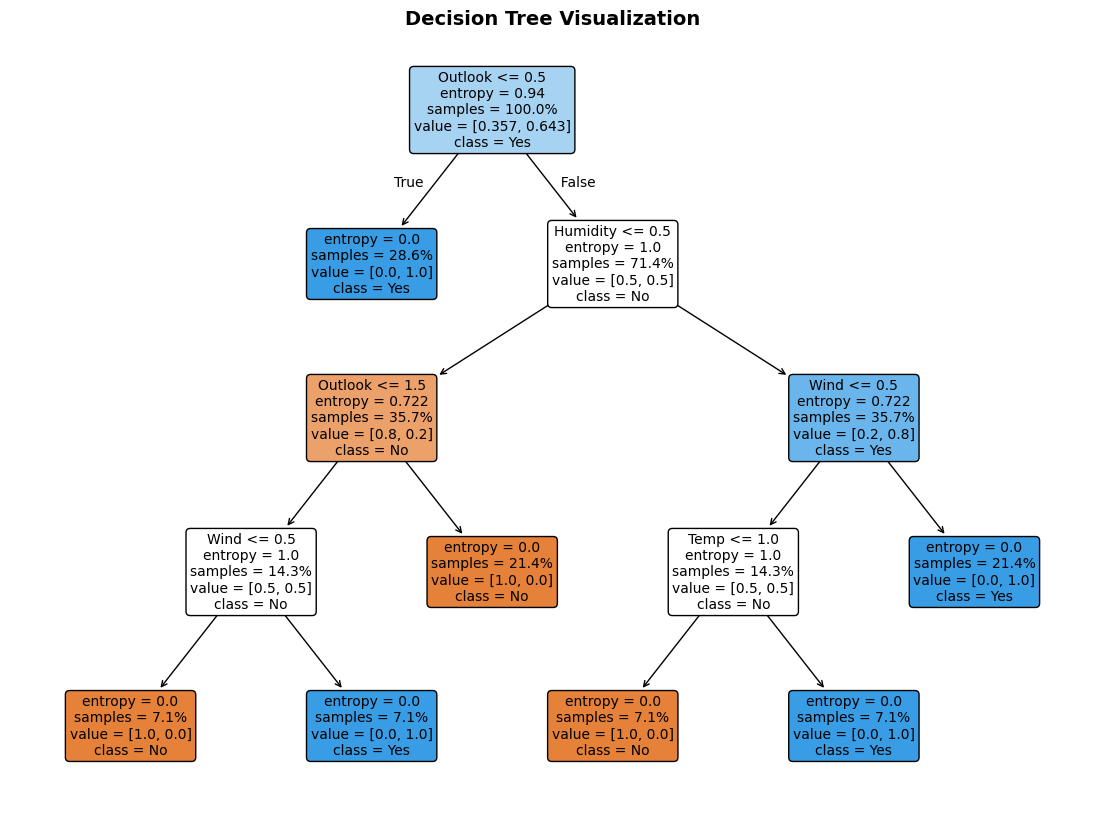

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "weather_data.csv"
df = pd.read_csv(file_path)

# Drop 'Day' column (not a feature)
df = df.drop(columns=['Day'])

# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Split features and target
X = df.drop(columns=["Decision"])
y = df["Decision"]

# Train ID3 Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X, y)

# Plot the decision tree (Improved visualization)
plt.figure(figsize=(14, 10))  # Larger figure size for clarity
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,  # Rounded boxes for a cleaner look
    fontsize=10,  # Adjust font size for readability
    proportion=True  # Scale the tree properly
)
plt.title("Decision Tree Visualization", fontsize=14, fontweight="bold")
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "weather_data.csv"
df = pd.read_csv(file_path)

# Drop 'Day' column (not a feature)
df = df.drop(columns=['Day'])

# Save original category labels before encoding
original_labels = {col: {val: i for i, val in enumerate(df[col].unique())} for col in df.columns}

# Encode categorical variables
for col in df.columns:
    df[col] = df[col].map(original_labels[col])

# Function to calculate entropy
def calculate_entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate Information Gain
def calculate_information_gain(df, feature, target):
    entropy_before = calculate_entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)

    # Weighted entropy after splitting
    weighted_entropy = sum((counts[i] / sum(counts)) * calculate_entropy(df[df[feature] == values[i]][target])
                           for i in range(len(values)))

    return entropy_before - weighted_entropy

# Function to build ID3 decision tree
def id3(df, target, features):
    # If all target values are the same, return that class (pure leaf)
    if len(np.unique(df[target])) == 1:
        return np.unique(df[target])[0]

    # If no features left to split, return majority class
    if len(features) == 0:
        return df[target].mode()[0]

    # Select the best feature with highest information gain
    info_gains = {feature: calculate_information_gain(df, feature, target) for feature in features}
    best_feature = max(info_gains, key=info_gains.get)

    # Create a subtree dictionary
    tree = {best_feature: {}}

    # Split data on best feature
    for value in np.unique(df[best_feature]):
        subset = df[df[best_feature] == value].drop(columns=[best_feature])
        tree[best_feature][value] = id3(subset, target, [f for f in features if f != best_feature])

    return tree

# Function to print the decision tree with numeric & categorical values
def print_tree(tree, original_labels, indent="", prefix=""):
    """ Recursively prints the tree with box-drawing characters and numeric values. """
    if isinstance(tree, dict):
        for i, (key, value) in enumerate(tree.items()):
            branch = "├── " if i < len(tree) - 1 else "└── "
            print(indent + prefix + branch + f"{key} ")
            next_indent = indent + ("│   " if i < len(tree) - 1 else "    ")

            for j, (sub_key, sub_value) in enumerate(value.items()):
                sub_branch = "├── " if j < len(value) - 1 else "└── "
                sub_label = [label for label, num in original_labels[key].items() if num == sub_key][0]  # Get category name
                print(next_indent + sub_branch + f"{sub_label} ({sub_key})")

                print_tree(sub_value, original_labels, next_indent + ("│   " if j < len(value) - 1 else "    "), "")
    else:
        print(indent + "└──  " + str(tree))  # Leaf node (decision)

# Build the ID3 decision tree
features = list(df.columns)
features.remove("Decision")
decision_tree = id3(df, "Decision", features)

# Print the decision tree with numeric values
print("\n DECISION TREE (With Numeric Values) \n")
print_tree(decision_tree, original_labels)



 DECISION TREE (With Numeric Values) 

└── Outlook 
    ├── Sunny (0)
    │   └── Humidity 
    │       ├── High (0)
    │       │   └──  0
    │       └── Normal (1)
    │           └──  1
    ├── Overcast (1)
    │   └──  1
    └── Rain (2)
        └── Wind 
            ├── Weak (0)
            │   └──  1
            └── Strong (1)
                └──  0
